# R Analysis Script with Tabulated Outputs


In [ ]:
# -------------------------------
# R Analysis Script with Tabulated Outputs
# -------------------------------

# ----------------------------------------------------
# Load necessary libraries
# ----------------------------------------------------

library(tidyverse)
library(ggplot2)
library(scales)
library(readr)
library(knitr)


Dataset *Collection*

In [ ]:
# ----------------------------------------------------
# 1. Dataset Collection
# --------------------------------------------------allstar_data <- read.csv("/content/AllstarFull.csv")
salaries_data <- read.csv("/content/Salaries (1).csv")
cat("Datasets loaded successfully!\n\n")


# Check for missing values in salaries_data
missing_salaries <- sapply(salaries_data, function(col) sum(is.na(col)))
cat("\nMissing values in salaries_data:\n")
print(kable(as.data.frame(missing_salaries)))

Datasets loaded successfully!


Missing values in salaries_data:


|         | missing_salaries|
|:--------|----------------:|
|yearID   |                0|
|teamID   |                0|
|lgID     |                0|
|playerID |                0|
|salary   |                0|


2. Data Processing and Normalization

In [ ]:
# ----------------------------------------------------
# 2. Data Preprocessing and Normalization
# ----------------------------------------------------
allstar_data <- allstar_data[!is.na(allstar_data$gameID), ]
allstar_data$GP[is.na(allstar_data$GP)] <- median(allstar_data$GP, na.rm = TRUE)
allstar_data$startingPos[is.na(allstar_data$startingPos)] <- -1

# IQR method to address outliers in the GP column
Q1 <- quantile(allstar_data$GP, 0.25)
Q3 <- quantile(allstar_data$GP, 0.75)
IQR <- Q3 - Q1
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR
allstar_data <- allstar_data[!(allstar_data$GP < lower_bound | allstar_data$GP > upper_bound), ]
cat("Data processing completed.\n\n")


Data processing completed.



# 3. Descriptive Statistics


Datasets merged successfully!


Descriptive statistics for 'salary' and 'GP' variables:


| mean_salary| median_salary| sd_salary|   var_salary| mean_GP| median_GP| sd_GP| var_GP|
|-----------:|-------------:|---------:|------------:|-------:|---------:|-----:|------:|
|     4774887|       3103333|   5088773| 2.589561e+13|       1|         1|     0|      0|

Frequency distribution for 'startingPos' variable:


|Var1 | Freq|
|:----|----:|
|-1   | 1101|
|0    |   10|
|1    |   62|
|2    |   62|
|3    |   62|
|4    |   61|
|5    |   62|
|6    |   61|
|7    |   62|
|8    |   62|
|9    |   62|
|10   |   22|

Correlation matrix of numeric variables:


Warning message in cor(numeric_vars, use = "complete.obs"):
“the standard deviation is zero”




|            |     yearID| gameNum| GP| startingPos|    salary|
|:-----------|----------:|-------:|--:|-----------:|---------:|
|yearID      |  1.0000000|      NA| NA|  -0.0491391| 0.4601899|
|gameNum     |         NA|       1| NA|          NA|        NA|
|GP          |         NA|      NA|  1|          NA|        NA|
|startingPos | -0.0491391|      NA| NA|   1.0000000| 0.1938446|
|salary      |  0.4601899|      NA| NA|   0.1938446| 1.0000000|


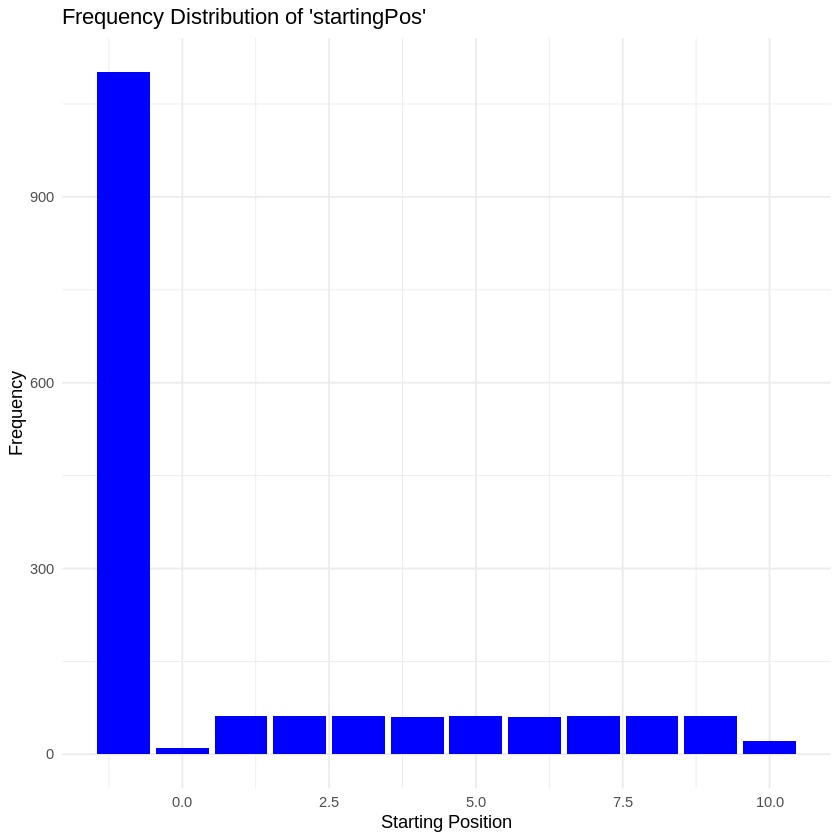

In [ ]:
# ----------------------------------------------------
# 3. Merge Data
#----------------------------------------------------
merged_data <- merge(allstar_data, salaries_data, by=c("playerID", "yearID"))
cat("Datasets merged successfully!\n\n")
# ----------------------------------------------------
# 4. Descriptive Statistics
# ----------------------------------------------------

# Basic statistical measures for the 'salary' and 'GP' variables
cat("\nDescriptive statistics for 'salary' and 'GP' variables:\n")
basic_stats <- merged_data %>%
  summarise(
    mean_salary = mean(salary, na.rm = TRUE),
    median_salary = median(salary, na.rm = TRUE),
    sd_salary = sd(salary, na.rm = TRUE),
    var_salary = var(salary, na.rm = TRUE),
    mean_GP = mean(GP, na.rm = TRUE),
    median_GP = median(GP, na.rm = TRUE),
    sd_GP = sd(GP, na.rm = TRUE),
    var_GP = var(GP, na.rm = TRUE)
  )
print(kable(basic_stats))

# Frequency distributions, histograms, and summary statistics for the 'startingPos' categorical variable
cat("\nFrequency distribution for 'startingPos' variable:\n")
startingPos_freq <- table(merged_data$startingPos)
print(kable(as.data.frame(startingPos_freq)))

ggplot(merged_data, aes(x=startingPos)) +
  geom_bar(fill="blue") +
  labs(title="Frequency Distribution of 'startingPos'", x="Starting Position", y="Frequency") +
  theme_minimal()

# Explore relationships and correlations among variables
cat("\nCorrelation matrix of numeric variables:\n")
numeric_vars <- merged_data[, sapply(merged_data, is.numeric)]
correlations <- cor(numeric_vars, use = "complete.obs")
print(kable(correlations))

In [ ]:
print(R.version.string)

# 4. Data Visualization


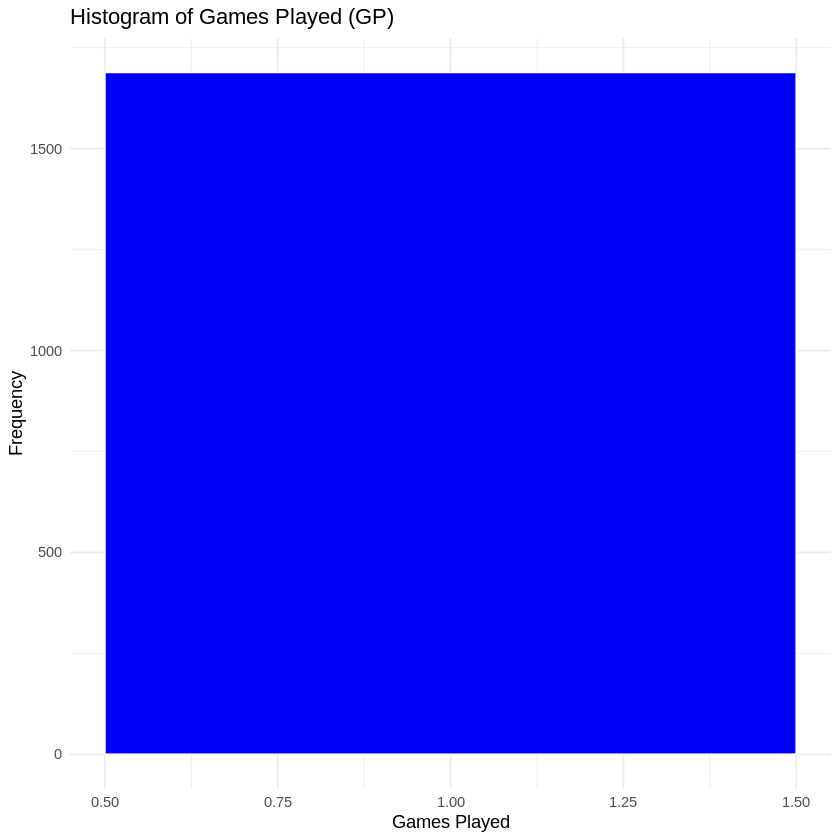

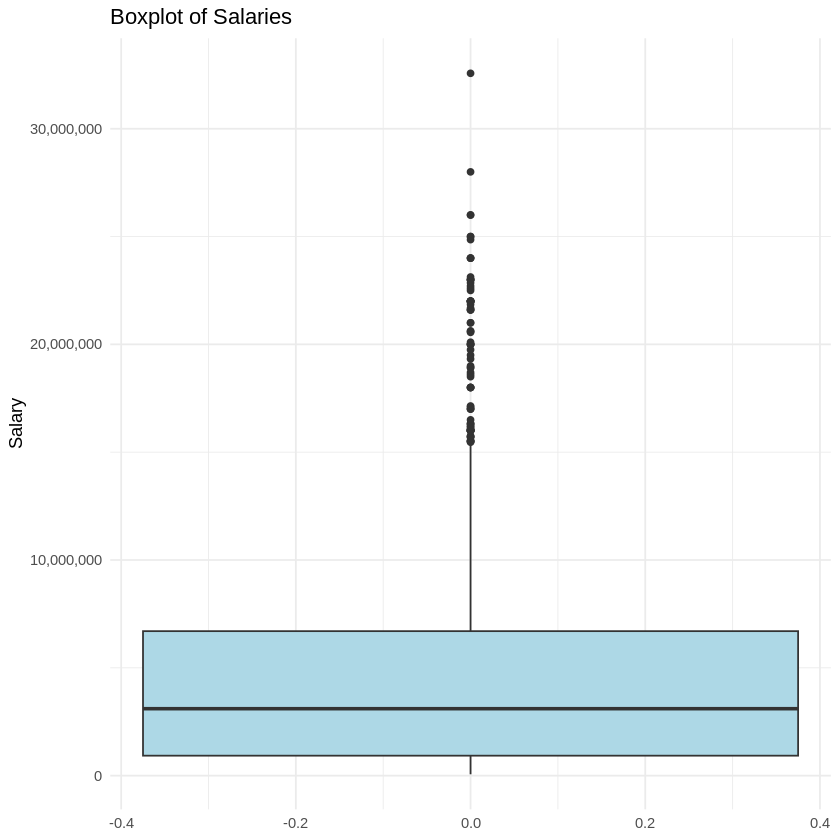

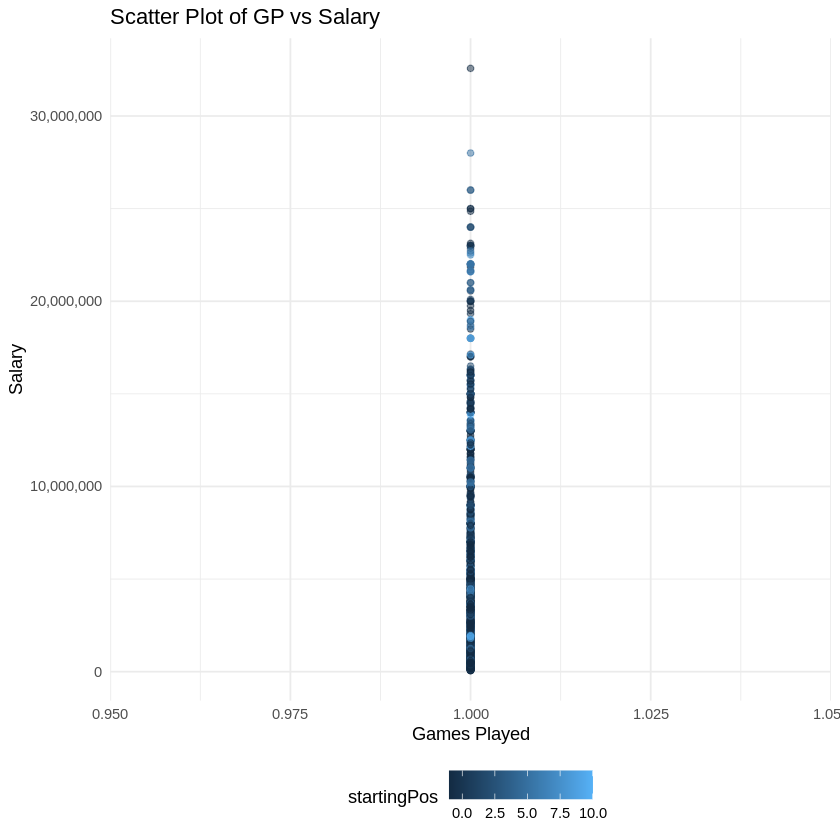

In [ ]:

# ----------------------------------------------------
# 4. Data Visualization
# ----------------------------------------------------

# Histogram for GP
gp_plot <- ggplot(merged_data, aes(x=GP)) +
  geom_histogram(binwidth=1, fill="blue", color="white") +
  labs(title="Histogram of Games Played (GP)", x="Games Played", y="Frequency") +
  theme_minimal()
print(gp_plot)

# Boxplot for salaries
salary_plot <- ggplot(merged_data, aes(y=salary)) +
  geom_boxplot(fill="lightblue") +
  labs(title="Boxplot of Salaries", y="Salary") +
  scale_y_continuous(labels = scales::comma) +
  theme_minimal()
print(salary_plot)

# Scatter plot for GP vs Salary
scatter_plot <- ggplot(merged_data, aes(x=GP, y=salary)) +
  geom_point(aes(color=startingPos), alpha=0.5) +
  labs(title="Scatter Plot of GP vs Salary", x="Games Played", y="Salary") +
  scale_y_continuous(labels = scales::comma) +
  theme_minimal() +
  theme(legend.position="bottom")
print(scatter_plot)

Advanced Analysis

In [ ]:
# ----------------------------------------------------
# 6. Advanced Analysis
# ----------------------------------------------------

# Linear Regression Model
linear_model <- lm(salary ~ GP + startingPos, data=merged_data)
cat("\nLinear Regression Summary:\n")
print(kable(summary(linear_model)$coefficients))

# ANOVA Test
anova_model <- aov(salary ~ as.factor(startingPos), data=merged_data)
cat("\nANOVA Test Summary for Salary Differences Across Starting Positions:\n")
print(kable(summary(anova_model)[[1]]))


Linear Regression Summary:


|            |  Estimate| Std. Error|   t value| Pr(>&#124;t&#124;)|
|:-----------|---------:|----------:|---------:|------------------:|
|(Intercept) | 4442414.8|  128229.48| 34.644256|                  0|
|startingPos |  295706.1|   36436.13|  8.115738|                  0|

ANOVA Test Summary for Salary Differences Across Starting Positions:


|                       |   Df|       Sum Sq|      Mean Sq| F value| Pr(>F)|
|:----------------------|----:|------------:|------------:|-------:|------:|
|as.factor(startingPos) |   11| 2.684877e+15| 2.440798e+14| 9.97691|      0|
|Residuals              | 1677| 4.102691e+16| 2.446446e+13|      NA|     NA|


Extended Data Analysis

Top 10 most frequent players in the All-Star dataset:


|Var1      | Freq|
|:---------|----:|
|ripkeca01 |   16|
|rodriiv01 |   14|
|bondsba01 |   13|
|jeterde01 |   13|
|alomaro01 |   12|
|boggswa01 |   12|
|gwynnto01 |   12|
|piazzmi01 |   11|
|rodrial01 |   11|
|cabremi01 |   10|


Warning message in cor(numeric_vars, use = "complete.obs"):
“the standard deviation is zero”


Correlation matrix of numeric variables:


|            |     yearID| gameNum| GP| startingPos|    salary|
|:-----------|----------:|-------:|--:|-----------:|---------:|
|yearID      |  1.0000000|      NA| NA|  -0.0491391| 0.4601899|
|gameNum     |         NA|       1| NA|          NA|        NA|
|GP          |         NA|      NA|  1|          NA|        NA|
|startingPos | -0.0491391|      NA| NA|   1.0000000| 0.1938446|
|salary      |  0.4601899|      NA| NA|   0.1938446| 1.0000000|
Average salaries by starting position:


| startingPos|   salary|
|-----------:|--------:|
|          -1|  3958654|
|           0| 10557901|
|           1|  5865789|
|           2|  5411146|
|           3|  7343945|
|           4|  4921056|
|           5|  6697718|
|           6|  6816695|
|           7|  6850399|
|           8|  5145840|
|           9|  6927897|
|          10|  6439766|


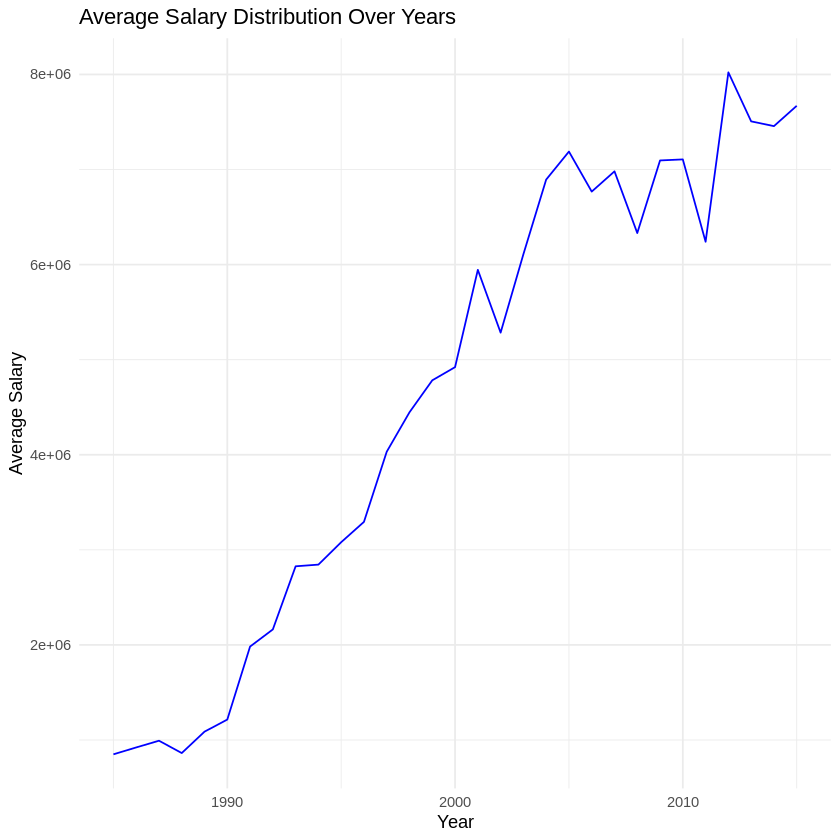

In [ ]:

# ----------------------------------------------------
# 7. Extended Data Analysis
# ----------------------------------------------------

# Player frequency in the All-Star dataset
player_freq <- table(merged_data$playerID)
top_players <- sort(player_freq, decreasing = TRUE)[1:10]
cat("Top 10 most frequent players in the All-Star dataset:\n")
print(kable(as.data.frame(top_players)))

# Salary distribution over years
avg_salaries_by_year <- aggregate(salary ~ yearID, data = merged_data, mean)
ggplot(avg_salaries_by_year, aes(x = yearID, y = salary)) +
  geom_line(color = "blue") +
  labs(title = "Average Salary Distribution Over Years", x = "Year", y = "Average Salary") +
  theme_minimal()

# Correlation analysis
numeric_vars <- merged_data[, sapply(merged_data, is.numeric)]
correlations <- cor(numeric_vars, use = "complete.obs")
cat("Correlation matrix of numeric variables:\n")
print(kable(correlations))

# Grouped analysis: Average salaries by starting position
avg_salaries_by_position <- aggregate(salary ~ startingPos, data = merged_data, mean)
cat("Average salaries by starting position:\n")
print(kable(avg_salaries_by_position))


# 8. Further Data Analysis

Top 10 players with the highest average salaries:


|playerID  | avg_salary|
|:---------|----------:|
|greinza01 |   18250000|
|hernafe02 |   18017786|
|rodrial01 |   17277871|
|teixema01 |   15791667|
|fieldpr01 |   15485833|
|cainma01  |   15333333|
|jeterde01 |   15175336|
|canoro01  |   14400000|
|drewjd01  |   14000000|
|beltrad01 |   13750000|
Players with the longest spans in the dataset:


|playerID  | start_year| end_year| span|
|:---------|----------:|--------:|----:|
|clemero02 |       1986|     2005|   19|
|bondsba01 |       1990|     2007|   17|
|griffke02 |       1990|     2007|   17|
|jeterde01 |       1998|     2014|   16|
|jonesch06 |       1996|     2012|   16|
|larkiba01 |       1988|     2004|   16|
|ripkeca01 |       1985|     2001|   16|
|riverma01 |       1997|     2013|   16|
|smoltjo01 |       1989|     2005|   16|
|rodriiv01 |       1992|     2007|   15|
Average salary by starting position:


| startingPos| avg_salary|
|-----------:|----------:|
|           0|

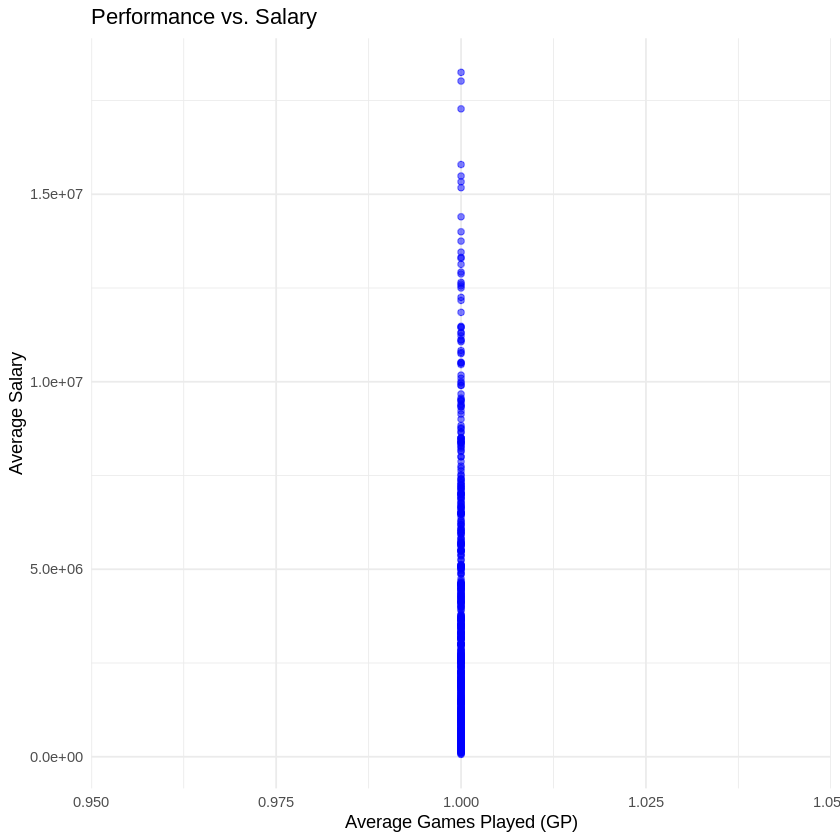

In [ ]:


# ----------------------------------------------------
# 8. Further Data Analysis
# ----------------------------------------------------

# Top Earners: Top 10 players with the highest average salaries
top_earners <- merged_data %>%
  group_by(playerID) %>%
  summarise(avg_salary = mean(salary, na.rm = TRUE)) %>%
  arrange(-avg_salary) %>%
  head(10)
cat("Top 10 players with the highest average salaries:\n")
print(kable(top_earners))




# Performance vs. Salary: Scatter plot showing relationship between average GP and average salary
performance_vs_salary <- merged_data %>%
  group_by(playerID) %>%
  summarise(avg_GP = mean(GP), avg_salary = mean(salary))
ggplot(performance_vs_salary, aes(x = avg_GP, y = avg_salary)) +
  geom_point(alpha = 0.5, color = "blue") +
  labs(title = "Performance vs. Salary", x = "Average Games Played (GP)", y = "Average Salary") +
  theme_minimal()

# Player Longevity: Span of players in the dataset
player_span <- merged_data %>%
  group_by(playerID) %>%
  summarise(start_year = min(yearID), end_year = max(yearID), span = end_year - start_year) %>%
  arrange(-span)
cat("Players with the longest spans in the dataset:\n")
print(kable(head(player_span, 10)))

# Position Analysis: Average salary by starting position
position_salary <- merged_data %>%
  group_by(startingPos) %>%
  summarise(avg_salary = mean(salary, na.rm = TRUE)) %>%
  arrange(-avg_salary)
cat("Average salary by starting position:\n")
print(kable(position_salary))

# ----------------------------------------------------
# End of Further Analysis
# ----------------------------------------------------
cat("\nFurther analysis completed successfully!\n")